In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


**Task 1.1.** Load the image:

In [2]:
imgf = imread('../data/NIH3T3/im/dna-0.png')

**Task 1.2.** Quantify the image into 256 bins:

In [3]:
img8 = (imgf * 255).round().astype(numpy.uint8)

**Task 1.3.** Compute the image histogram:

In [4]:
h = [None] * 256
for i in range(0, 256):
    h[i] = (img8 == i).sum()

Show the computed histogram:

<BarContainer object of 256 artists>

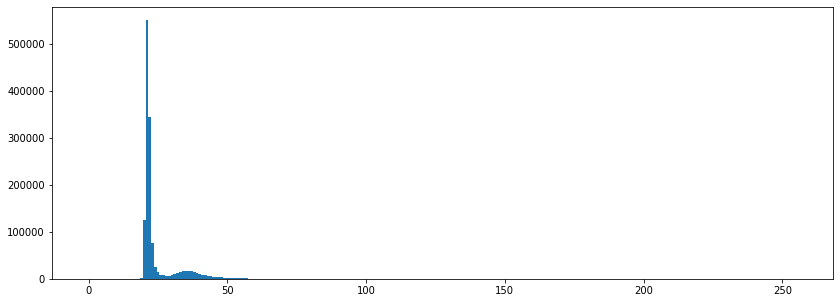

In [5]:
figure(figsize=(14,5))
bar(range(256), h, width=1)

**Task 1.4.** Implement the method of Otsu:

In [6]:
min_otsu_score = +inf
T_opt = None

for T in range(1, 256):
    n1 = (img8 <  T).sum()
    n2 = (img8 >= T).sum()
    var1 = var(img8[img8 <  T]) if n1 > 0 else 0
    var2 = var(img8[img8 >= T]) if n2 > 0 else 0
    otsu_score = n1 * var1 + n2 * var2
    if otsu_score < min_otsu_score:
        min_otsu_score = otsu_score
        T_opt = T

print(T_opt)

31


**Task 1.5.** Perform Otsu thresholding:

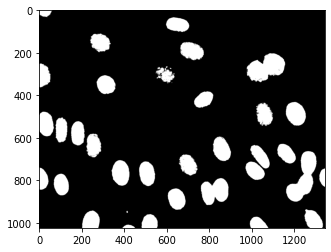

In [7]:
seg = (img8 >= T_opt)
imshow(seg, 'gray')

**Task 1.6.** Compute the Dice coefficient:

In [8]:
gt = imread('../data/NIH3T3/gt/0.png').astype(bool)
dice = 2 * (gt * seg).sum() / (gt.sum() + seg.sum())
print(dice)

0.8943783223933183
